In [15]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [16]:
file_list, class_list = [], []

IMG_SIZE = 80
DATADIR = '/home/sashankk/Proj/integrate/CNN_Model/Train'
CATEGORIES = ["left","right","up","down"]

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img_array)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #print(img_array,len(img_array))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
X, y = [], []

for features, label in training_data:
    X.append(features)
    y.append(label)

#print(len(X),len(y),X[0])

#print(y)


In [17]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(len(X[0]))
y = np.array(y)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [18]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

In [19]:
# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

In [20]:
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(4))
model.add(Activation("softmax"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 78, 78, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 37, 37, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                  

In [22]:
# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.05)

Epoch 1/40
14/14 [==============================] - 4s 237ms/step - loss: 1.3799 - accuracy: 0.2640 - val_loss: 2.0284 - val_accuracy: 0.0000e+00
Epoch 2/40
14/14 [==============================] - 3s 220ms/step - loss: 1.3687 - accuracy: 0.2953 - val_loss: 1.4429 - val_accuracy: 0.0000e+00
Epoch 3/40
14/14 [==============================] - 3s 223ms/step - loss: 1.2584 - accuracy: 0.4452 - val_loss: 1.1170 - val_accuracy: 0.6250
Epoch 4/40
14/14 [==============================] - 3s 225ms/step - loss: 1.0138 - accuracy: 0.5503 - val_loss: 1.0298 - val_accuracy: 0.5000
Epoch 5/40
14/14 [==============================] - 3s 222ms/step - loss: 0.8776 - accuracy: 0.5638 - val_loss: 0.9847 - val_accuracy: 0.2917
Epoch 6/40
14/14 [==============================] - 3s 228ms/step - loss: 0.8083 - accuracy: 0.5526 - val_loss: 0.6281 - val_accuracy: 0.7500
Epoch 7/40
14/14 [==============================] - 3s 232ms/step - loss: 0.7436 - accuracy: 0.5817 - val_loss: 0.8814 - val_accuracy: 0.375

In [23]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


INFO:tensorflow:Assets written to: CNN.model/assets


INFO:tensorflow:Assets written to: CNN.model/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


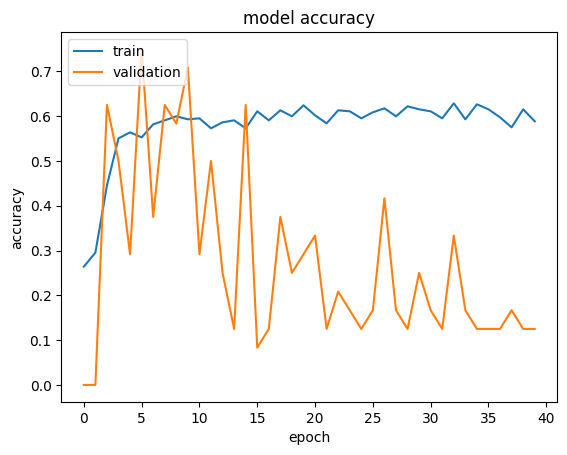

In [24]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()